# Importations

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import gym
%matplotlib inline
import torch 
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import os 
import collections
!pip install tensor-dash
from tensordash.tensordash import Tensordash

import sys
# Import python files 
!wget https://github.com/clementbernardd/Count-Based-Exploration/raw/main/zip/python.zip
!unzip python.zip
!rm python.zip
!mkdir models
!mkdir results

sys.path.append('/content/python')

from RL_algorithm import *
from utils import * 
from buffer import * 
from ddqn_agent import *
from qnetwork import *
from state import *
from simhash import * 
from train import * 


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

--2021-04-22 06:56:16--  https://github.com/clementbernardd/Count-Based-Exploration/raw/main/zip/python.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/clementbernardd/Count-Based-Exploration/main/zip/python.zip [following]
--2021-04-22 06:56:17--  https://raw.githubusercontent.com/clementbernardd/Count-Based-Exploration/main/zip/python.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16143 (16K) [application/zip]
Saving to: ‘python.zip’

python.zip          100%[===================>]  15.76K  --.-KB/s    in 0s      

2021-04-22 06:56:17 (94.8 MB/s) - ‘python.zip’ saved [16143/16143]

Arc

# Environments 

In [2]:
# Mountain Car 
# env = gym.make('MountainCar-v0')
# env = gym.make('CartPole-v0')
# Mountain Car Continuous
# env = gym.make('MountainCarContinuous-v0')
# CartPoleSwingUp
# env = gym.make("CartPoleSwingUp-v0")
# Acrobot
# env = gym.make('Acrobot-v1')
# Pendulum
# env = gym.make('Pendulum-v0')

# env = gym.make("Taxi-v3").env

In [3]:
ENVS = {'acrobot' : gym.make('Acrobot-v1') ,\
        'cartpole' : gym.make('CartPole-v0'),
        'mountain' : gym.make('MountainCar-v0')}

In [4]:
NAME_ALGORITHM = 'ddqn'
SEEDS = [77,7,17,75,73,2,11,89,99,6]

In [5]:
create_files(ENVS, NAME_ALGORITHM)

# Double DQN

![picture](https://raw.githubusercontent.com/clementbernardd/Count-Based-Exploration/main/images/ddqn.png)

# Count based exploration

![picture](https://github.com/clementbernardd/Count-Based-Exploration/raw/main/images/algorithm1.png)

In [33]:
HP = {'acrobot' : {
          'BUFFER_SIZE' : 500,
          'state_emb' : 64,
          'hidden_size' : 64,
          'batch_size' : 32,
          'gamma' : 0.99,
          'optimizer' : optim.Adam,
          'criterion' : nn.MSELoss(),
          'lr' : 1e-3,
          'UPDATE_EVERY' : 10,
          'k' : 16,
          'beta' : 0.1,
          'device' : device
            },
      'cartpole' : 
      {
          'BUFFER_SIZE' : 1000,
          'state_emb' : 64,
          'hidden_size' : 64,
          'batch_size' : 32,
          'gamma' : 0.99,
          'optimizer' : optim.Adam,
          'criterion' : nn.MSELoss(),
          'lr' : 1e-3,
          'UPDATE_EVERY' : 50,
          'k' : 32,
          'beta' : 0.1,{}
          'device' : device
      },
      'mountain' : 
      {
        'BUFFER_SIZE' : 5000,
          'state_emb' : 64,
          'hidden_size' : 64,
          'batch_size' : 32,
          'gamma' : 0.99,
          'optimizer' : optim.Adam,
          'criterion' : nn.MSELoss(),
          'lr' : 1e-3,
          'UPDATE_EVERY' : 50,
          'k' : 32,
          'beta' : 0.9,
          'device' : device
      }
}

In [7]:
all_means = {env : None for env in ENVS}
all_means_cb = {env : None for env in ENVS}
all_hash_cb = {env : None for env in ENVS}

# Acrobot environment 

In [8]:
CURRENT_ENV = list(ENVS.keys())[0]

In [9]:
all_means[CURRENT_ENV], _ = train_all_deep(DDQNAgent, HP[CURRENT_ENV], n_episodes = 200, name_env = CURRENT_ENV,env = ENVS[CURRENT_ENV],name = NAME_ALGORITHM,SEEDS = SEEDS,\
                                      TRAIN = Train, count_based= False)

SEED 0/10


/content/python/buffer.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  experiences = np.array(list(self.buffer))[indexes]


--- Save model checkpoint ---
--- Save model checkpoint ---
SEED 1/10
SEED 2/10
SEED 3/10
SEED 4/10
SEED 5/10
SEED 6/10
SEED 7/10
SEED 8/10
SEED 9/10


In [10]:
all_means_cb[CURRENT_ENV], all_hash_cb[CURRENT_ENV] = train_all_deep(DDQNAgent, HP[CURRENT_ENV], n_episodes = 200, name_env = CURRENT_ENV,\
                                                                env = ENVS[CURRENT_ENV],name = NAME_ALGORITHM,SEEDS = SEEDS,\
                                                                TRAIN = Train, count_based= True)

SEED 0/10


/content/python/buffer.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  experiences = np.array(list(self.buffer))[indexes]


--- Save model checkpoint ---
--- Save model checkpoint ---
SEED 1/10
SEED 2/10
SEED 3/10
SEED 4/10
SEED 5/10
SEED 6/10
SEED 7/10
SEED 8/10
SEED 9/10


## Rewards

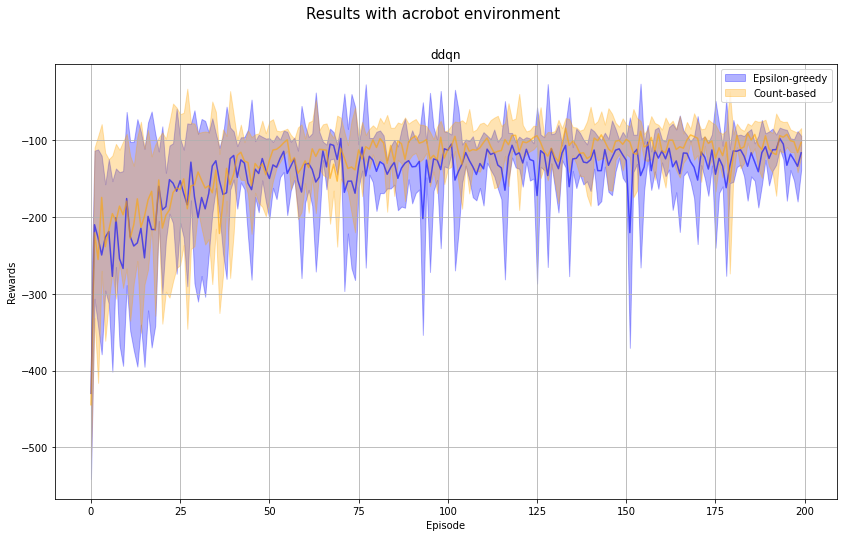

In [11]:
plot_rewards([all_means[CURRENT_ENV]], [all_means_cb[CURRENT_ENV]], names = [NAME_ALGORITHM], env_name = CURRENT_ENV)

## Histogram of the states 

In [12]:
hashes = get_hashes_mean(all_hash_cb[CURRENT_ENV])

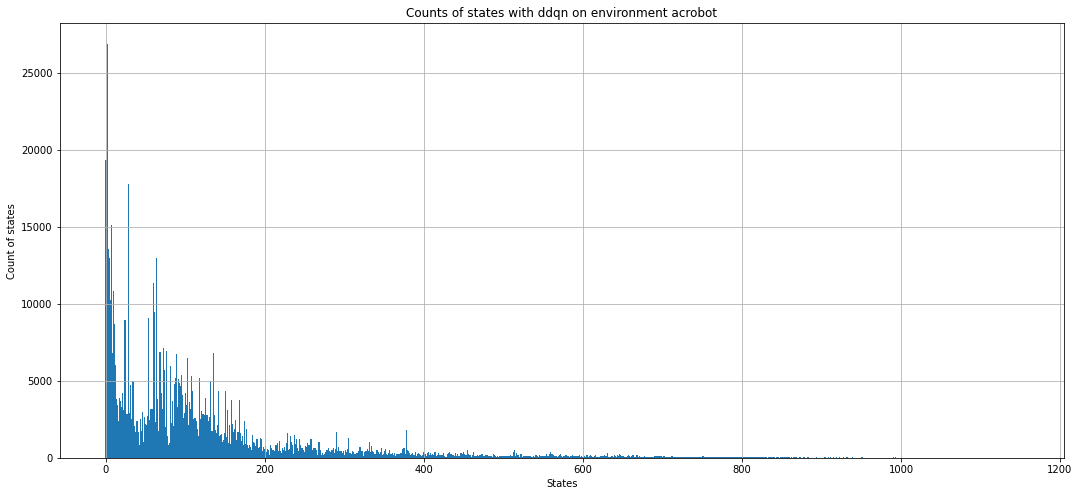

In [13]:
plot_barchart_count_based(hashes, figsize = (18,8),method = NAME_ALGORITHM, env_name = CURRENT_ENV)

# Cartpole environment 

In [ ]:
CURRENT_ENV = list(ENVS.keys())[1]

In [ ]:
all_means[CURRENT_ENV], _ = train_all_deep(DDQNAgent, HP[CURRENT_ENV], n_episodes = 200, name_env = CURRENT_ENV,env = ENVS[CURRENT_ENV],name = NAME_ALGORITHM,SEEDS = SEEDS,\
                                      TRAIN = Train, count_based= False)

SEED 0/10


/content/python/buffer.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  experiences = np.array(list(self.buffer))[indexes]


--- Save model checkpoint ---
--- Save model checkpoint ---
SEED 1/10
SEED 2/10
SEED 3/10
SEED 4/10
SEED 5/10
SEED 6/10
SEED 7/10
SEED 8/10
SEED 9/10


In [ ]:
all_means_cb[CURRENT_ENV], all_hash_cb[CURRENT_ENV] = train_all_deep(DDQNAgent, HP[CURRENT_ENV], n_episodes = 200, name_env = CURRENT_ENV,\
                                                                env = ENVS[CURRENT_ENV],name = NAME_ALGORITHM,SEEDS = SEEDS,\
                                                                TRAIN = Train, count_based= True)

SEED 0/10


/content/python/buffer.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  experiences = np.array(list(self.buffer))[indexes]


--- Save model checkpoint ---
--- Save model checkpoint ---
SEED 1/10
SEED 2/10
SEED 3/10
SEED 4/10
SEED 5/10
SEED 6/10
SEED 7/10
SEED 8/10
SEED 9/10


## Rewards

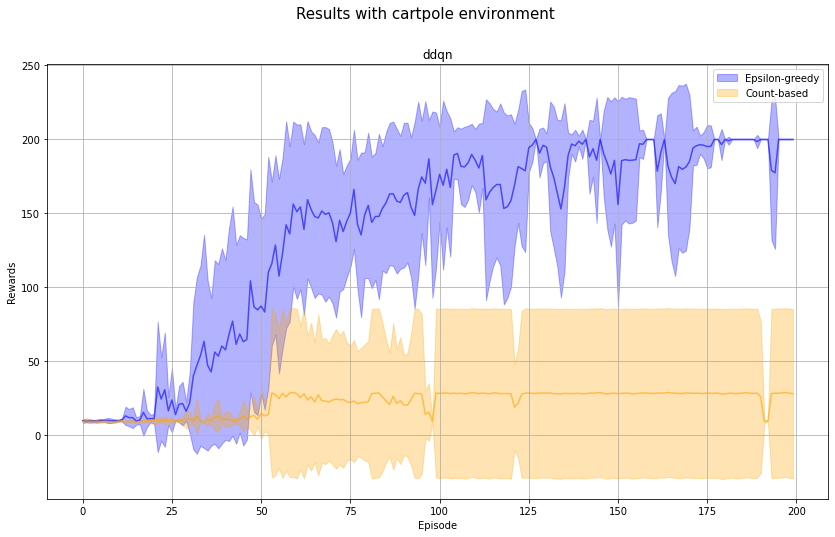

In [ ]:
plot_rewards([all_means[CURRENT_ENV]], [all_means_cb[CURRENT_ENV]], names = [NAME_ALGORITHM], env_name = CURRENT_ENV)

## Histogram of the states 

In [ ]:
hashes = get_hashes_mean(all_hash_cb[CURRENT_ENV])

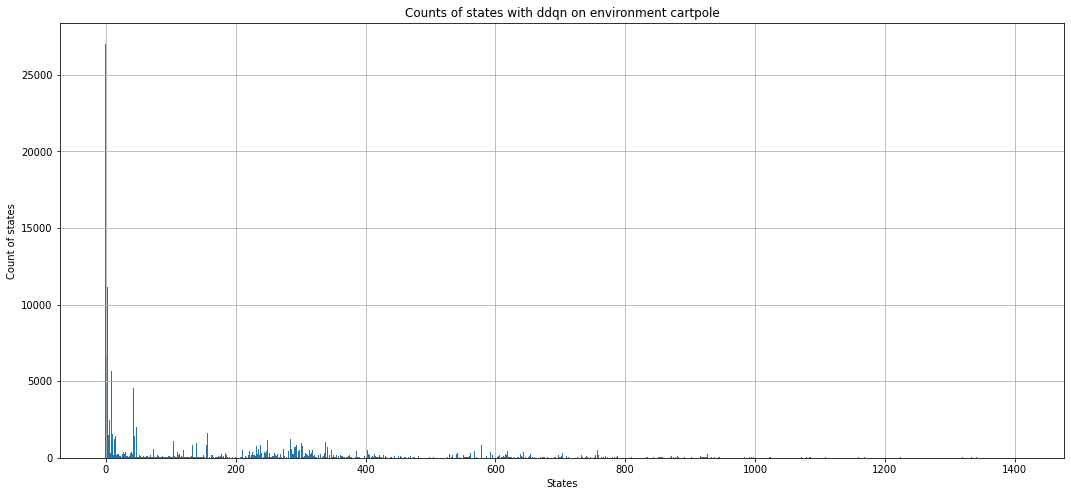

In [ ]:
plot_barchart_count_based(hashes, figsize = (18,8),method = NAME_ALGORITHM, env_name = CURRENT_ENV)

# Mountain environment 

In [20]:
CURRENT_ENV = list(ENVS.keys())[2]

In [21]:
all_means[CURRENT_ENV], _ = train_all_deep(DDQNAgent, HP[CURRENT_ENV], n_episodes = 200, name_env = CURRENT_ENV,env = ENVS[CURRENT_ENV],name = NAME_ALGORITHM,SEEDS = SEEDS,\
                                      TRAIN = Train, count_based= False)

SEED 0/10


/content/python/buffer.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  experiences = np.array(list(self.buffer))[indexes]


--- Save model checkpoint ---
--- Save model checkpoint ---
SEED 1/10
SEED 2/10
SEED 3/10
SEED 4/10
SEED 5/10
SEED 6/10
SEED 7/10
SEED 8/10
SEED 9/10


In [22]:
all_means_cb[CURRENT_ENV], all_hash_cb[CURRENT_ENV] = train_all_deep(DDQNAgent, HP[CURRENT_ENV], n_episodes = 200, name_env = CURRENT_ENV,\
                                                                env = ENVS[CURRENT_ENV],name = NAME_ALGORITHM,SEEDS = SEEDS,\
                                                                TRAIN = Train, count_based= True)

SEED 0/10


/content/python/buffer.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  experiences = np.array(list(self.buffer))[indexes]


--- Save model checkpoint ---
--- Save model checkpoint ---
SEED 1/10
SEED 2/10
SEED 3/10
SEED 4/10
SEED 5/10
SEED 6/10
SEED 7/10
SEED 8/10
SEED 9/10


## Rewards

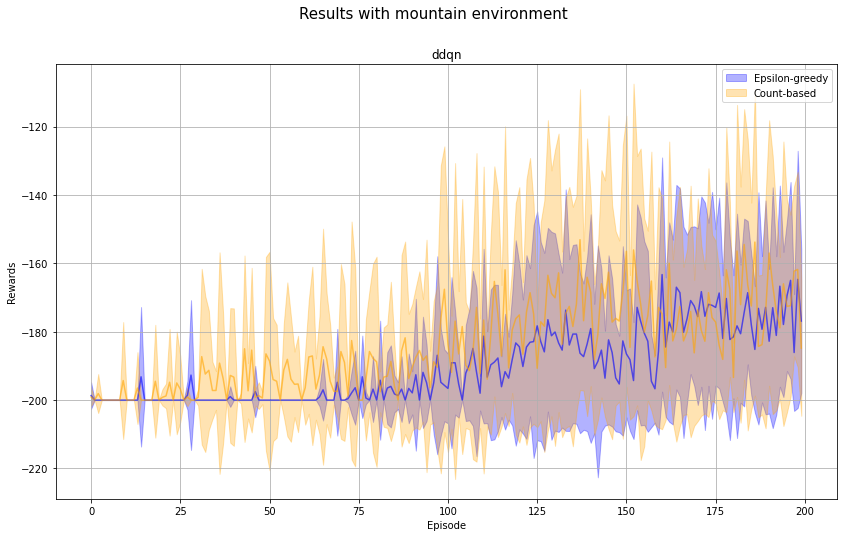

In [23]:
plot_rewards([all_means[CURRENT_ENV]], [all_means_cb[CURRENT_ENV]], names = [NAME_ALGORITHM], env_name = CURRENT_ENV)

## Histogram of the states 

In [24]:
hashes = get_hashes_mean(all_hash_cb[CURRENT_ENV])

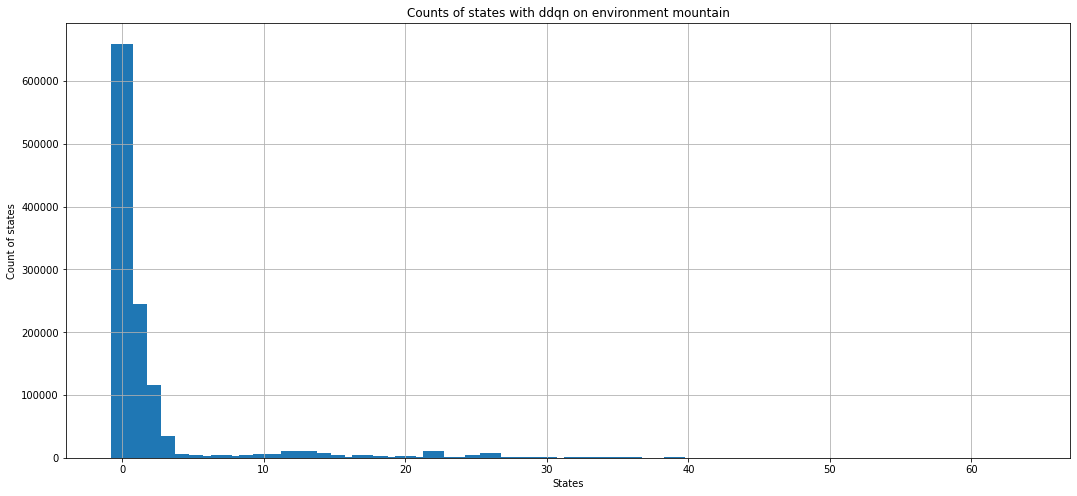

In [25]:
plot_barchart_count_based(hashes, figsize = (18,8),method = NAME_ALGORITHM, env_name = CURRENT_ENV)